## Part 0: Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

## Part 1: Exploratory Data Analysis

In [59]:
# load the data
df = pd.read_excel("Visa Data Science Project Dataset1.xls")

In [60]:
# take a look at the data
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X18,X19,X20,X21,X22,X23,X24,X25,X26,Y
0,1,20000,F,2,1,24,1,1,0,0,...,0,1284.000000,0,689,0,0,0,0,114.833333,1
1,2,120000,F,2,2,26,0,1,0,0,...,3261,2846.166667,0,1000,1000,1000,0,2000,833.333333,1
2,3,70000,M,2,2,30,1,1,1,0,...,36894,56447.500000,3200,0,3000,3000,1500,0,1783.333333,1
3,4,20000,M,1,2,24,0,0,1,1,...,19104,17693.500000,3200,0,1500,0,1650,0,1058.333333,1
4,5,120000,F,2,1,39,0,0,0,0,...,316,316.000000,316,316,0,632,316,0,263.333333,1


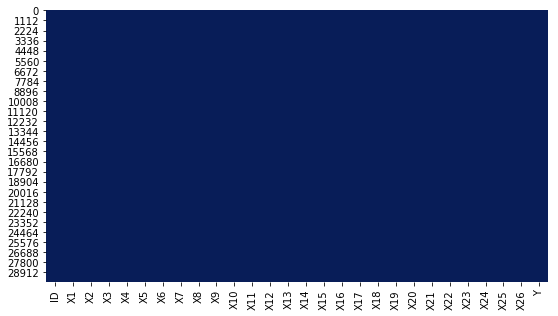

In [61]:
# check for missing data
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [62]:
# double-check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
ID     30000 non-null int64
X1     30000 non-null int64
X2     30000 non-null object
X3     30000 non-null int64
X4     30000 non-null int64
X5     30000 non-null int64
X6     30000 non-null int64
X7     30000 non-null int64
X8     30000 non-null int64
X9     30000 non-null int64
X10    30000 non-null int64
X11    30000 non-null int64
X12    30000 non-null int64
X13    30000 non-null int64
X14    30000 non-null int64
X15    30000 non-null int64
X16    30000 non-null int64
X17    30000 non-null int64
X18    30000 non-null int64
X19    30000 non-null float64
X20    30000 non-null int64
X21    30000 non-null int64
X22    30000 non-null int64
X23    30000 non-null int64
X24    30000 non-null int64
X25    30000 non-null int64
X26    30000 non-null float64
Y      30000 non-null int64
dtypes: float64(2), int64(25), object(1)
memory usage: 6.4+ MB


Looks like there are no missing data, all columns have 30000 records.   
However, let's check if there are any abnormal values

### Some plots

#### Distribution of amount of credit

C:\Users\Steven Zhang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


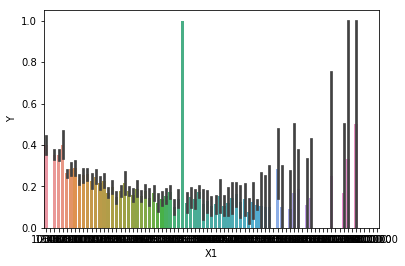

In [63]:
# Amount of credit
sns.barplot(x='X1', y = 'Y', data = df)

C:\Users\Steven Zhang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


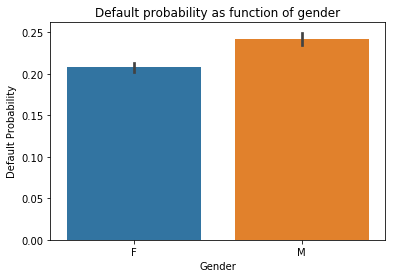

In [64]:
# Gender 
# More men than women have payment default
sns.barplot(x='X2',y = 'Y', data = df)
plt.ylabel("Default Probability")
plt.xlabel("Gender")
plt.title("Default probability as function of gender")
plt.show()

C:\Users\Steven Zhang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


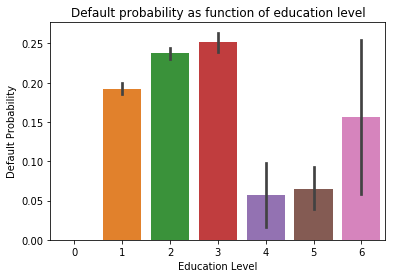

In [65]:
# Education Level
# As we can see from the below bar chart, X3 only has four levels 1-4 but observed 5 and 6
sns.barplot(x='X3',y = 'Y', data = df)
plt.ylabel("Default Probability")
plt.xlabel("Education Level")
plt.title("Default probability as function of education level")
plt.show()

C:\Users\Steven Zhang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


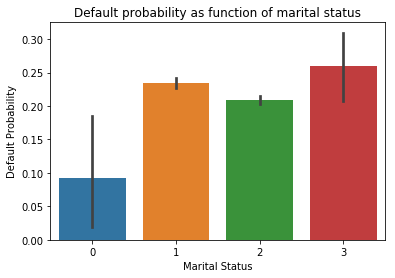

In [67]:
# Marital Status
# Again, abnormal values detected. 
sns.barplot(x='X4',y = 'Y', data = df)
plt.ylabel("Default Probability")
plt.xlabel("Marital Status")
plt.title("Default probability as function of marital status")
plt.show()

C:\Users\Steven Zhang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


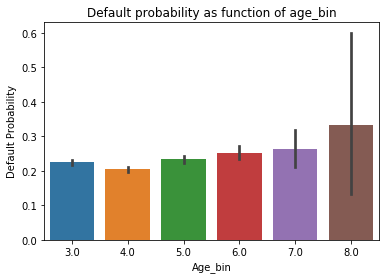

In [66]:
# Age
# Combine different age to age_bin, for example age from 21-30 equals 3 in age_bin
df['age_bin'] = np.nan
for i in range(10, 0, -1):
    df.loc[df['X5'] <= i*10, 'age_bin'] = i
sns.barplot(x='age_bin', y = 'Y', data = df)
plt.ylabel("Default Probability")
plt.xlabel("Age_bin")
plt.title("Default probability as function of age_bin")
plt.show()

### Check if our data is balanced

0.2212


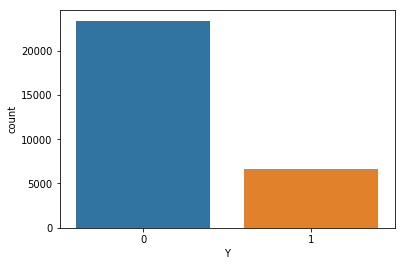

In [68]:
sns.countplot(x='Y', data = df)
print(df.Y.sum()/df.Y.count())

More people do not have payment default (22.1% default)  
Our base model: No one has payment default (accuracy: 77.9%)

### Check correlation

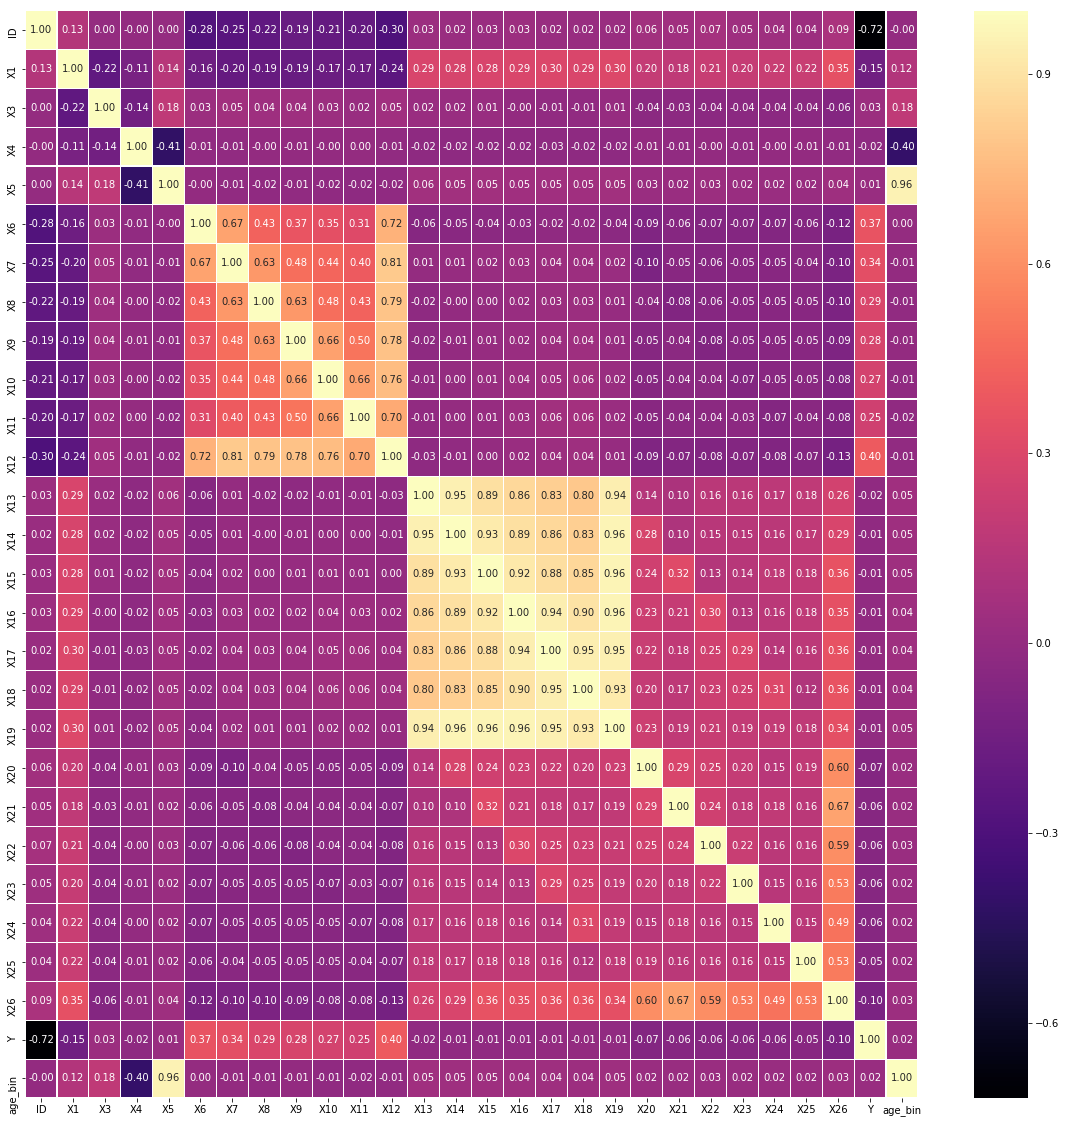

In [69]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show()

From a heatmap we can see that feature X6-X12 are the most correlated with our prediction variable,  
which
makes sense since X6-X12 are the history of default

## Part 2: Data Wranglin and Feature Engineering

In [71]:
# Change X3 values from {0,5,6} to 4 which represents others
df.loc[df['X3']==0, 'X3'] = 4
df.loc[df['X3']==5, 'X3'] = 4
df.loc[df['X3']==6, 'X3'] = 4

# Change X4 values from 0 to 3
df.loc[df['X4']==0, 'X4'] = 3

# Bining age
df['age_bin'] = np.nan
for i in range(10, 0, -1):
    df.loc[df['X5'] <= i*10, 'age_bin'] = i

In [72]:
# Because we are dealing with un-balanced data here, first we need to upsample
# After upsample, our base model accuracy will also decrease since we have increased the number of defa
from sklearn.utils import resample
df_default = df[df.Y==1]
df_notdefault = df[df.Y==0]
df_default_upsampled = resample(df_default, replace = True, n_samples = 2 * len(df_default['X1']), random_state = 123)
df_upsampled = pd.concat([df_notdefault, df_default_upsampled])
df_upsampled.Y.value_counts()

0    23364
1    13272
Name: Y, dtype: int64

Separate features and label

In [73]:
Y = df_upsampled['Y']
df = df_upsampled.drop('Y', axis=1)
df = df.drop('ID', axis=1)
df = pd.get_dummies(df, columns = ['X2', 'X3', 'X4'], drop_first=True)

Split the dataset to train/test set

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 0)

Normalization

In [75]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,x_test.shape)

(29308, 30) (7328, 30)


## Part 3: Supervised Learning

didn't use gridsearch, took too long to run, limited time

### Random Forest

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
rfc = RandomForestClassifier()

# param_grid = {'n_estimators':[50,100,150,200,300], 'max_depth':[3,5,10], 'max_features':[10,15,20]}
# rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
# rf_grid.fit(x_train, y_train)

n_trees = [50,100,150,200,300]
score = 0
for i in n_trees:
    rfc = RandomForestClassifier(n_estimators = i, random_state = 42, oob_score = True)
    rfc.fit(x_train, y_train)
    scores = rfc.score(x_test, y_test)
    if rfc.score(x_test, y_test)> score:
        score = rfc.score(x_test, y_test)
        rfc_best = rfc
    print(rfc.oob_score_)
print(score)

0.8983212774669033
0.9032346117101133
0.9049406305445612
0.9054865565715845
0.9056571584550294
0.9128002183406113


### Boosting Classifiers
Combine mutiple 'weak-learners' to obtain a higher accuracy
#### Adaboost

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
n_clas = [10,20,50,100,200,300,500]

score = 0
for i in n_clas:
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = i, learning_rate = 0.1)
    abc.fit(x_train, y_train)
    if abc.score(x_test, y_test)> score:
        score = abc.score(x_test, y_test)
        abc_best = abc
AB_score = score
print(AB_score)

0.7437227074235808


#### GradientBoosting

In [94]:
score = 0
for i in n_clas:
    gbc = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.01, n_estimators = i)
    gbc.fit(x_train, y_train)
    if gbc.score(x_test, y_test)> score:
        score = gbc.score(x_test, y_test)
        gbc_best = gbc
GB_score = score
print(GB_score)

0.7471342794759825


#### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
LR_score = accuracy_score(y_test, pred_logreg)
print(LR_score)

0.7386735807860262


#### Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb = gnb.predict(x_test)
NB_score = accuracy_score(y_test, pred_gnb)
print(NB_score)

0.7177947598253275


#### Nueral Network Implemented in Keras  
After trying both upsampled version and original version of the dataset, I find that the dataset without upsampling reaches a higher accuracy for neural network.

In [90]:
### Reload and preprocess the data.

df = pd.read_excel('Visa Data Science Project Dataset1.xls')
df.head()

df.loc[df['X3']==0, 'X3'] = 4
df.loc[df['X3']==5, 'X3'] = 4
df.loc[df['X3']==6, 'X3'] = 4

df.loc[df['X4']==0, 'X4'] = 3

Y = df['Y']
X = df.drop('Y',axis = 1)

X_new = pd.concat([X['X1'],pd.get_dummies(X['X2']),X['X3'],pd.get_dummies(X['X4']), X.iloc[:,5:13], X.iloc[:,19:]],axis = 1)
print(len(X_new.columns))
X_new.head()

### split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.20, random_state=0)
x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)

### Normalize the data with 0 mean and unit variance
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



import keras
from keras.layers import Dense, Activation, BatchNormalization, Dropout


clf = keras.Sequential()
clf.add(Dense(20, activation='relu', name='fc1', input_dim = x_train.shape[1]))
clf.add(BatchNormalization())
clf.add(Dropout(rate = 0.2))
clf.add(Dense(10, activation = 'relu', name = 'fc2', input_dim = 20))
clf.add(BatchNormalization())
clf.add(Dropout(rate = 0.2))
clf.add(Dense(4, activation = 'relu', name = 'fc3', input_dim = 10))
clf.add(BatchNormalization())
# clf.add(Dropout(rate = 0.1))
clf.add(Dense(4, activation = 'relu', name = 'fc4', input_dim = 4))
clf.add(Dense(1, activation = 'sigmoid', name = 'out',input_dim = 4))

optimizer = keras.optimizers.Adam(lr = 0.1)
clf.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
clf.fit(x = x_train, y = y_train, epochs = 100, batch_size = 100)
NN_score = clf.evaluate(x_test, y_test)[1]
print(NN_score)

ModuleNotFoundError: No module named 'keras'

### The stucture of Neural Network
A 5-layer(4-hidden layer) Neural Netwsork.  
Here's the details of each layer:   

| Layer names   |      number of neurons      |  activation functions | BatchNorm|Dropout|
|:----------:|:-------------:|:------:|:------:|:------:|
| fc1 |  20 | Relu |Y|Y|
| fc2 |    10  |   Relu |Y|Y|
| fc3 | 4 |    Relu |Y|N|
| fc3 | 4 |    Relu |N|N|
| out (output layer) | 1 |    Sigmoid |N|N|

Implementations:  
- Optimization: Adam algorithm, learning rate = 0.1
- Metric: Cross entropy loss
- number of epochs = 100
- batch size = 100

In [ ]:
scores = [RF_score,AB_score,GB_score,LR_score,NB_score,NN_score]

### Conclusion

- With EDA, we learned there are no missing data but many abnormal values for certain columns  
- Through feature engineering, we are able to improve model performance but due to time limit, left some un-important features in the model (low correlation ones)  
- In part 3, the best models are Random Forest Classifier and Neural Network, with accuracy score of 91.2% and 82%.